In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import yfinance as yf
import quandl as ql

In [2]:
df = pd.read_csv('stocks.csv')

df = df[df['Country']== 'United States']

df = list(df[df['Sector'] != np.nan]['Symbol'])

#df = yf.download(df, start = '2020-01-01', end = '2020-12-20')

In [3]:
d = pd.DataFrame(df, columns = ['stock'])

d['strength'] = np.nan

d.index = d['stock']

d.drop('stock', axis = 1, inplace = True)

In [8]:
def aboveMa(ticket,movingAverage, start_date, end_date):
    
    c = yf.download(ticket,threads= False, start = start_date, end = end_date)
    
    counter = 0 
    #temp = c[ticket].rolling(window = movingAverage).mean()[movingAverage:]
    temp = c['Adj Close'].rolling(window = movingAverage).mean()[movingAverage:]
    #for p,m in zip(c[ticket][movingAverage:],temp):
    for p,m in zip(c['Adj Close'][movingAverage:],temp):
        if int(p)>m:
            counter += 1

    return(counter/len(temp))

 
    

In [ ]:
counter = 0 

for i in d.index:
    try:
        d['strength'].loc[i] = aboveMa(i,20, '2020-01-01', '2020-12-20')
    except:
        print('no data')
    counter +=1
    print(counter)
    

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B327162F48>]],
      dtype=object)

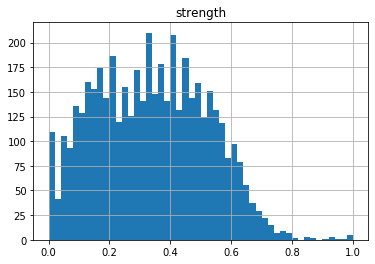

In [14]:
d.hist(bins = 50)

In [15]:
aboveMa('se',20, '2020-01-01', '2020-12-23')

[*********************100%***********************]  1 of 1 completed


0.7929515418502202

In [16]:
aboveMa('se',20, '2020-10-01', '2020-12-23')

[*********************100%***********************]  1 of 1 completed


0.868421052631579

In [17]:
aboveMa('ttd',20, '2020-01-01', '2020-12-23')

[*********************100%***********************]  1 of 1 completed


0.7444933920704846

In [18]:
aboveMa('ttd',20, '2020-10-01', '2020-12-23')

[*********************100%***********************]  1 of 1 completed


0.9210526315789473

In [29]:
print(d.sort_values(by = ['strength'], ascending = False)[:100].to_string())

       strength
stock          
PDAC   1.000000
INAQ   1.000000
PAIC   1.000000
TLS    1.000000
CERE   1.000000
PRAX   0.960000
U      0.955556
SVAL   0.937500
ALGM   0.937500
TVTX   0.920000
STTK   0.900000
PRLD   0.875000
FSTX   0.863636
ONCR   0.857143
FHTX   0.850000
EBC    0.846154
TWCT   0.800000
ATHA   0.800000
KYMR   0.796875
RADI   0.794118
SE     0.791111
SNOW   0.787234
CRSR   0.785714
LEAP   0.785714
TMTS   0.785714
SQ     0.777778
LUNG   0.777778
NGA    0.774194
XJR    0.769231
NVDA   0.764444
MRTX   0.764444
ALGS   0.760000
CLCT   0.760000
EAR    0.760000
IIVIP  0.756757
TWST   0.755556
CRWD   0.751111
AVGO   0.751111
CVNA   0.746667
TTD    0.742222
KNSL   0.742222
NOW    0.737778
ZG     0.737778
IDXX   0.737778
BLK    0.737778
ZM     0.737778
RH     0.733333
LOGI   0.733333
SAM    0.728889
BL     0.728889
SITM   0.724444
RARE   0.724444
Z      0.724444
AVGOP  0.724444
DOCU   0.724444
TSLA   0.720000
TMO    0.715556
CDNS   0.715556
POOL   0.715556
NVMZ   0.714286
SVAC   0

In [31]:
d.to_pickle('momentum')

In [32]:
pd.read_pickle('momentum')

,strength
stock,
A,0.657778
AACQ,0.092593
AACQU,0.010870
AACQW,NaN
AAIC,0.133333
...,...
ZTS,0.608889
ZUMZ,0.453333
ZVO,0.231111
